<a href="https://colab.research.google.com/github/BNLCSISMR/Smoking-Obesity-Project/blob/main/%5BFINAL%5D_TreeBased_SMOKER_SelectionSmokingTumorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GEOparse



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 278 kB 18.1 MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29065 sha256=65dd3df0121a167297ec1c639bfab8ef82284c098f5c197fc8cb56644aa98a39
  Stored in directory: /root/.cache/pip/wheels/4d/15/e8/fbf3b47444215d9728c20d7b35436b50086aa67c2ad6dcedad
Successfully built GEOparse


In [2]:
a = 2
a = 4
myList = [1, 2]
#use different names in the for loops

for a in myList:
  print(a)

print(a)

1
2
2


In [3]:
import GEOparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline



gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")


04-Aug-2022 03:45:16 DEBUG utils - Directory ./ already exists. Skipping.
04-Aug-2022 03:45:16 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
100%|██████████| 69.4M/69.4M [00:00<00:00, 94.3MB/s]
04-Aug-2022 03:45:17 DEBUG downloader - Size validation passed
04-Aug-2022 03:45:17 DEBUG downloader - Moving /tmp/tmp6r0dz5s_ to /content/GSE46699_family.soft.gz
04-Aug-2022 03:45:17 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz
04-Aug-2022 03:45:17 INFO GEOparse - Parsing ./GSE46699_family.soft.gz: 
04-Aug-2022 03:45:17 DEBUG GEOparse - DATABASE: GeoMiame
04-Aug-2022 03:45:17 DEBUG GEOparse - SERIES: GSE46699
04-Aug-2022 03:45:17 DEBUG GEOparse - PLATFORM: GPL570
/usr/local/lib/python3.7/dist-packages/GEOparse/GEOparse.py:545: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=F

In [4]:
import pandas as pd
import torch


In [5]:

print()
print("GSM example:")

for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         print(value[1])
         print(value[2])
         print(value[3])
    #print ("Table data:",)
    #print (gsm.table.head())
    

print()

#print("GPL example:")
#for gpl_name, gpl in gse.gpls.items():
 #   print("Name: ", gpl_name)
  #  print("Metadata:",)
   # for key, value in gpl.metadata.items():
    #    print(" - %s : %s" % (key, ", ".join(value)))
    #print("Table data:",)
    #print(gpl.table.head())
    #break


GSM example:
Name:  GSM1134764
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134765
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134766
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134767
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134768
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134769
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134770
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134771
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134772
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134773
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134774
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134775
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134776
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134777
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134778
Metadata:
tissue: normal
smoking: yes
obese: yes
Name:  GSM

Printing the name, head, and items

Create a merged table of the first gsm table we have. Print the head and test out accessing one column

In [6]:
mergedTable = gsm.table
entry = mergedTable["VALUE"]

Iterate through all of the tables and add the values column to the end of the mergedTable

In [7]:
for gsm_name, gsm in gse.gsms.items():
    entry = gsm.table["VALUE"]
    mergedTable.insert(1, gsm_name, value=entry, allow_duplicates=True)
    ##mergedTable = mergedTable.assign(gsm_name = entry)

    ##gsm.table = pd.merge(mergedTable, gsm.table, how = 'inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


Print mergedTable

drop the last column as it is a duplicate

In [8]:
mergedTable = mergedTable.iloc[: , :-1]

Transpose the table to make ID_REF the index

In [9]:
newMergeTable = mergedTable.transpose()

In [10]:
newMergeTable = newMergeTable.rename(columns=newMergeTable.iloc[0])
newMergeTable = newMergeTable.iloc[1: , :]

In [11]:
tissueList = []
tissue_label = []
smokingList = []
smoking_label = []
obesityList = []
obesity_label = []
for gsm_name, gsm in gse.gsms.items():
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         substringOne = 'tumor'
         substringTwo = 'yes'
         substringThree = 'yes'
         
         ##Appending all the values to tissue list if its a tumor or not (tumor = 1 normal = 0)
         if substringOne in value[1]:
           tissueList.append(1)
           tissue_label.append('tumor')
         else:
           tissueList.append(0)
           tissue_label.append('normal')
         
         ##Appending all teh values to the smoking list(smoker=1 non-smoker = 0)
         if substringTwo in value[2]:
           smokingList.append(1)
           smoking_label.append('yes')
         else:
           smokingList.append(0)
           smoking_label.append('no')

        ##Appending all teh values to the obesity list(obese = 1 not obese = 0)
         if substringThree in value[3]:
           obesityList.append(1)
           obesity_label.append('yes')
         else:
           obesityList.append(0)
           obesity_label.append('no')
  
print(tissueList)
print(tissue_label)

print(smokingList)
print(smoking_label)

print(obesityList)
print(obesity_label)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
['normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 

Creating a labels dataframe

In [12]:
#class_labels = pd.DataFrame()

#class_labels['Tissue'] = tissueList
#class_labels['Smoker'] = smokingList
#class_labels['Obesity'] = obesityList
print(newMergeTable)
#print(class_labels)
newMergeTable.shape

            1007_s_at   1053_at    117_at     121_at 1255_g_at   1294_at  \
GSM1304423  10.465147  5.131448  6.003662  11.353257  3.580513  7.227263   
GSM1304422   10.69537  6.117586  6.233694  11.162211  3.420228  7.583564   
GSM1304421   9.785637  4.844387  5.841087  11.198888  3.461025  7.071538   
GSM1304420  10.023791  6.786107  6.438581   9.745609  3.431811  7.204418   
GSM1134889    8.99498  5.530289  5.672777   9.624678  4.034493  6.979319   
...               ...       ...       ...        ...       ...       ...   
GSM1134768  10.106417  4.827499  5.668851  11.194256   3.47619  7.254072   
GSM1134767  10.735899  6.154403  6.539063  10.490871  3.499183  7.313254   
GSM1134766   9.919435  4.628159  5.636217  11.073223  3.479632  7.034347   
GSM1134765   9.812106  5.776783  6.422235  11.142645  3.524682  7.052937   
GSM1134764  10.654552  5.104113  5.372776  11.908765  3.500414  7.154525   

             1316_at   1320_at 1405_i_at   1431_at  ... AFFX-r2-Ec-bioD-3_at  \
GSM1304

(130, 54675)

Using tree based feature selection to get importance scores

In [320]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(newMergeTable, smokingList)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
newMergeTableTwo = model.transform(newMergeTable)


importance_List = []




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



creating a list of all importance scores

In [321]:
for i,v in enumerate(importances):
	importance_List.append(v)
print(importance_List)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012943722943722957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

sorting all the scores descending

In [322]:
sortedImportance_List = sorted(importance_List, reverse=True)
print(sortedImportance_List)

len(importance_List)


[0.00344560454420703, 0.0034209216601612923, 0.0031107555172324845, 0.003094464330354567, 0.0029813664596273315, 0.0028414553815011507, 0.002792095757934269, 0.002792095757934268, 0.0027303667960070334, 0.002681601272534467, 0.002563269226666851, 0.0025457211870255343, 0.0025335931474038914, 0.0024514889211929023, 0.0023593447040652, 0.0023591290962209784, 0.0023169725556126362, 0.00230185360834322, 0.002301637717010389, 0.002294606883210884, 0.0022852707993900284, 0.002284664819398393, 0.00225739664729847, 0.0022545054052073195, 0.0022214534139935356, 0.002195279149946806, 0.0021911997233309056, 0.002091803386950293, 0.0020891116941529225, 0.0020826071249725126, 0.0020723133351042058, 0.0020658530383930837, 0.002057431586790622, 0.002057431586790621, 0.0020451860429752857, 0.002039223325992342, 0.002036030595813207, 0.0020350675559956165, 0.002024240855762594, 0.002018633540372671, 0.0020170902218588083, 0.0020134011548586534, 0.001993712138639674, 0.0019913419913419926, 0.00198572363

54675

concrete example to help

In [127]:
a = [45, 17, 19, 20]
b = [17, 19, 20, 45]
c = []
for i in b:
  c.append(a.index(i))
print(c)

[1, 2, 3, 0]


Gets the index of the sorted features scores and adds them to list

In [323]:
from sklearn.preprocessing import scale
from sklearn import decomposition
print("FEATURE IMPORTANCES", importance_List)
print("FEATURE IMPORTANCES(SORTED)", sortedImportance_List)
importance_indices = []

for i in sortedImportance_List:
  importance_indices.append(importance_List.index(i))

print("INDICES",importance_indices)

FEATURE IMPORTANCES [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012943722943722957, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Check if the code worked

In [324]:
print(importance_List[44598])

0.0


In [325]:
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'],
        'Height': [5.1, 6.2, 5.1, 5.2],
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']}
  
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)
print(df)
print()
print(df.iloc[:,1])

     Name  Height Qualification
0     Jai     5.1           Msc
1  Princi     6.2            MA
2  Gaurav     5.1           Msc
3    Anuj     5.2           Msc

0    5.1
1    6.2
2    5.1
3    5.2
Name: Height, dtype: float64


Now time to create a new table of only the most important features

In [357]:
finalMergeTable = pd.DataFrame()

#number of iterations based on how many features may be changed based on how many create a good PCA plot
for i in range (35):
  targetColumn = newMergeTable.iloc[:,importance_indices[i]]
  finalMergeTable.insert(len(finalMergeTable.columns), i, targetColumn)

print(finalMergeTable)


                  0         1         2         3         4         5   \
GSM1304423   6.57727  4.554397  6.946439  5.607784  6.036455    4.6526   
GSM1304422  6.618403  4.662581  7.417182  4.638109  6.043009  4.850492   
GSM1304421  6.421731  4.517995  7.044951  5.462974  6.017539  4.024764   
GSM1304420  6.443292  4.193122  7.594758  5.229969  6.347807  4.889192   
GSM1134889  6.331572  4.454995  7.850438  5.263056   6.79453  3.928081   
...              ...       ...       ...       ...       ...       ...   
GSM1134768  7.110699  5.028214  7.432083   4.96789  6.450447  4.493621   
GSM1134767  6.421973  4.675153  7.615081   4.25262  6.161187  4.100343   
GSM1134766  6.831561  5.131579  7.605382  4.830432  6.339131   4.36821   
GSM1134765   6.50912  4.986279  7.571193  4.803746  6.589604  4.832378   
GSM1134764  6.756027  5.260748  7.035039  5.642062  6.062813  4.696884   

                  6         7         8         9   ...        25        26  \
GSM1304423  4.118535  4.437947  

In [358]:
pca = decomposition.PCA(n_components=2)
pca.fit(finalMergeTable)



PCA(n_components=2)

In [359]:
scores = pca.transform(finalMergeTable)

In [360]:
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2'])
scores_df

,PC1,PC2
0,0.329606,2.316544
1,1.781235,1.725280
2,0.801427,2.499419
3,4.152970,-0.734038
4,0.229005,0.648785
...,...,...
125,-1.436768,-3.103311
126,-0.334371,-0.670427
127,-2.574256,0.098786
128,-3.038647,1.127483


In [348]:
import plotly.express as px

In [361]:
# Label to color dict (manual)
label_color_dict_tissue = {'tumor':'red','normal':'green'}
label_color_dict_obesity = {'yes': 'red', 'no': 'green'}
label_color_dict_smoker = {'yes': 'red', 'no': 'green'}

# Color vector creation
cvec_tissue = [label_color_dict_tissue[label] for label in tissue_label]
cvec_obesity = [label_color_dict_obesity[label] for label in obesity_label]
cvec_smoker = [label_color_dict_smoker[label] for label in smoking_label]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



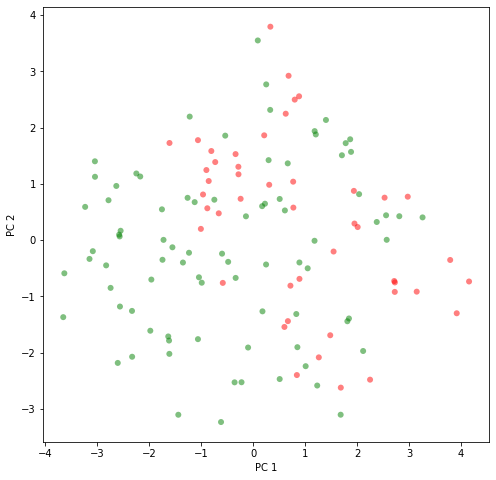

In [362]:
plt.figure(figsize=(8,8))
plt.scatter(scores[:,0], scores[:,1],
            c=cvec_smoker, edgecolor='', alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

PCA Plot displaying tissue (red = tumor & green = normal)

In [363]:
fig = px.scatter(scores_df, x = 'PC1', y = 'PC2', color=cvec_smoker, title = "Tree Based Feature Extraction PCA (TISSUE)")
fig.show()